In [ ]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "worldbank_data_exploration"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [1]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from data_sources.get import get_indicators

In [2]:
raw_df = get_indicators(["SP.POP.GROW"])

df = raw_df.drop(columns=["Country Code", "Indicator Code", "Indicator Name"])
df = df.pivot(index="Year", values="Value", columns="Country Name")
df = df.loc[1980:]
df.head()

Country Name  Afghanistan  Africa Eastern and Southern  \
Year                                                     
1980            -0.407658                     2.974336   
1981            -1.393416                     2.970648   
1982            -2.219780                     2.965384   
1983            -2.712854                     2.965636   
1984            -2.695382                     2.975573   

Country Name  Africa Western and Central   Albania   Algeria  American Samoa  \
Year                                                                           
1980                            2.781425  2.047964  3.030949        2.499743   
1981                            2.784998  2.002974  3.087059        3.162521   
1982                            2.787465  2.113272  3.121642        3.705314   
1983                            2.786851  2.120885  3.123717        4.046390   
1984                            2.783817  2.103937  3.087594        4.123824   

Country Name   Andorra    Angola  Antigua and Barbuda  Arab World  ...  \
Year                                                               ...   
1980          3.493189  3.453859            -0.140539    3.267353  ...   
1981          3.902019  3.524002            -0.116458    3.210183  ...   
1982          4.221843  3.552753            -0.014567    3.160193  ...   
1983          4.349871  3.567178            -0.001619    3.109858  ...   
1984          4.433469  3.564179             0.008093    3.063230  ...   

Country Name  Uzbekistan   Vanuatu  Venezuela, RB   Vietnam  \
Year                                                          
1980            2.689072  2.678328       2.746701  2.209934   
1981            2.625390  2.518242       2.698379  2.260407   
1982            2.574967  2.377333       2.655137  2.299439   
1983            2.536518  2.292343       2.622139  2.320988   
1984            2.514304  2.264584       2.602651  2.319029   

Country Name  Virgin Islands (U.S.)  West Bank and Gaza     World  \
Year                                                                
1980                       3.527092                 NaN  1.748661   
1981                       0.217556                 NaN  1.764068   
1982                       0.215085                 NaN  1.800490   
1983                       0.279419                 NaN  1.784324   
1984                       0.250811                 NaN  1.747125   

Country Name  Yemen, Rep.    Zambia  Zimbabwe  
Year                                           
1980             3.487555  3.400982  3.413262  
1981             3.586454  3.419161  3.539858  
1982             3.693147  3.417329  3.616362  
1983             3.765405  3.389747  3.658056  
1984             3.802102  3.332364  3.657575  

[5 rows x 265 columns]

In [3]:
countries_with_nans = df.isna().count()[df.isna().any() == True]
countries_with_nans

Country Name
Eritrea               41
Kuwait                41
New Zealand           41
West Bank and Gaza    41
dtype: int64

In [4]:
df_cleared = df.drop(columns=countries_with_nans.index.values)
len(df_cleared.columns)

261

In [5]:
countries = [
    "Poland",
    "Ukraine",
    "Czech Republic",
    "Zimbabwe",
    "China",
    "United States",
    "Russian Federation",
    "Japan",
    "France",
]
df_to_visualise = df_cleared.loc[:, countries]
df_to_visualise.head()

Country Name    Poland   Ukraine  Czech Republic  Zimbabwe     China  \
Year                                                                   
1980          0.923267  0.436999        0.115087  3.413262  1.254221   
1981          0.907868  0.509305       -0.034963  3.539858  1.280952   
1982          0.920285  0.324040        0.138101  3.616362  1.472675   
1983          0.937689  0.356620        0.087506  3.658056  1.444950   
1984          0.904591  0.375057        0.061557  3.657575  1.312069   

Country Name  United States  Russian Federation     Japan    France  
Year                                                                 
1980               0.959590            0.709655  0.788153  0.444047  
1981               0.981415            0.667503  0.728461  0.486055  
1982               0.953318            0.628288  0.693656  0.519415  
1983               0.914379            0.598251  0.695583  0.545603  
1984               0.865817            0.757353  0.648317  0.558734

<AxesSubplot:xlabel='Year', ylabel='Population growth (%)'>

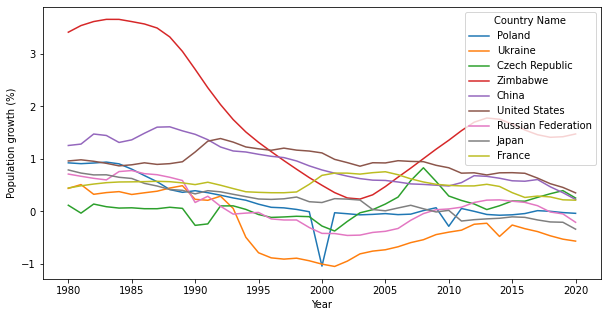

In [6]:
df_to_visualise.plot(figsize=(10, 5), ylabel="Population growth (%)")

In [7]:
X_base = df_cleared.values.T
X_base.shape

(261, 41)

In [8]:
countries = df_cleared.columns.values
countries.shape

(261,)

In [9]:
years = df_cleared.index.values
years.shape

(41,)

In [10]:
import time


def run_and_measure(fun, *args, **kwargs):
    start = time.time()
    retval = fun(*args, **kwargs)
    end = time.time()
    return retval, end - start

# Data preprocessing

In [11]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(X_base)

# def preprocess(X):
#     # return scaler.transform(X)
#     return X - 1.

# def preprocess_inverse(X):
#     # return scaler.inverse_transform(X)
#     return X + 1.

In [12]:
from sklearn.preprocessing import normalize

norm_feature = None


def preprocess(X):
    global norm_feature
    X, norm_feature = normalize(X, return_norm=True)
    return X


def preprocess_inverse(X):
    return np.multiply(X, norm_feature[:, None])

In [13]:
X = preprocess(X_base)

In [14]:
MAE_SCALE = 10_000

# PCA

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)

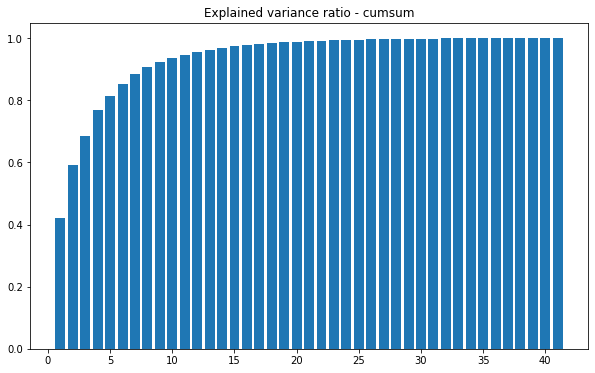

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(
    np.arange(1, pca.explained_variance_ratio_.shape[0] + 1),
    pca.explained_variance_ratio_.cumsum(),
)
plt.title("Explained variance ratio - cumsum")
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error

for i in range(1, 21):
    X_tmp = X_pca[:, :i] @ pca.components_[:i] + pca.mean_
    mae = mean_absolute_error(X, X_tmp)
    print(f"First {i:2} components: mae={mae*MAE_SCALE:0.6f}")

First  1 components: mae=442.398009
First  2 components: mae=352.364128
First  3 components: mae=287.891661
First  4 components: mae=241.175504
First  5 components: mae=216.819161
First  6 components: mae=179.537970
First  7 components: mae=155.261854
First  8 components: mae=132.651336
First  9 components: mae=117.755991
First 10 components: mae=107.909176
First 11 components: mae=96.414762
First 12 components: mae=91.458005
First 13 components: mae=85.522807
First 14 components: mae=76.763784
First 15 components: mae=72.079246
First 16 components: mae=67.326855
First 17 components: mae=63.038021
First 18 components: mae=57.085381
First 19 components: mae=52.980854
First 20 components: mae=48.308624


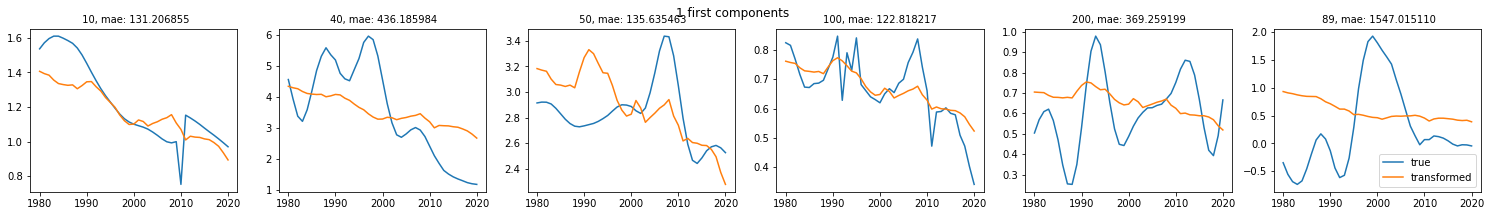

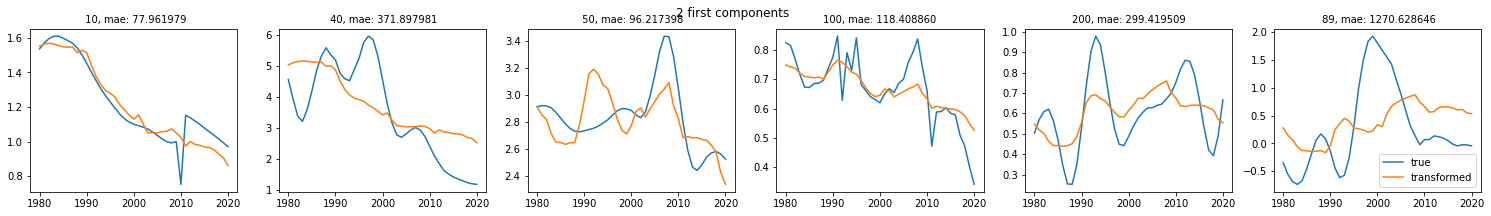

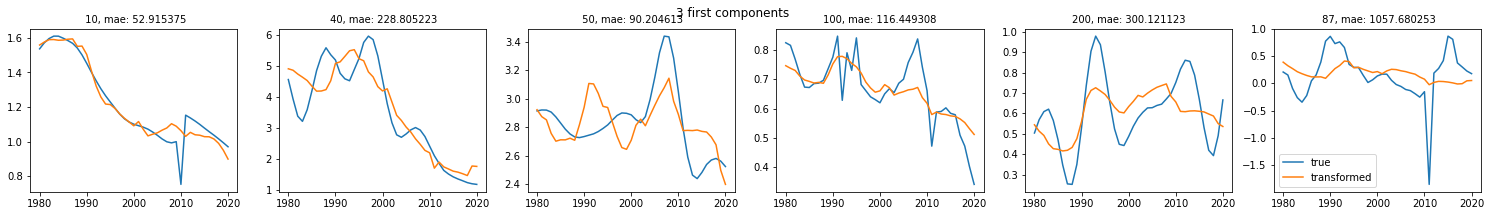

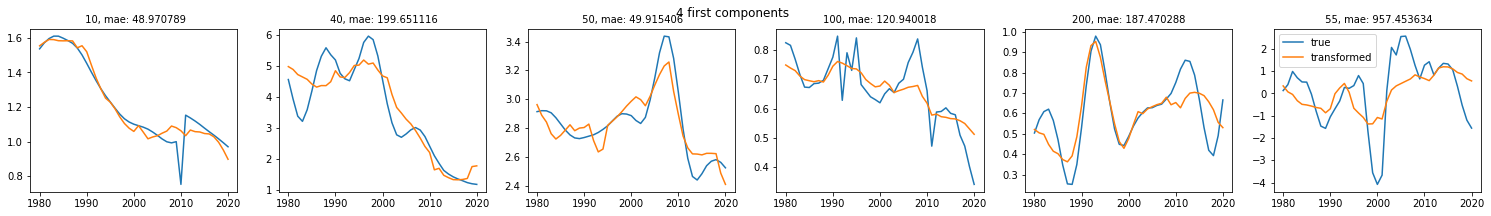

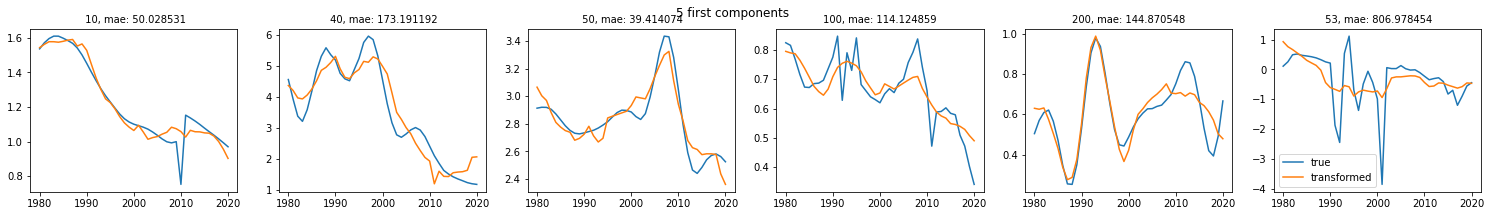

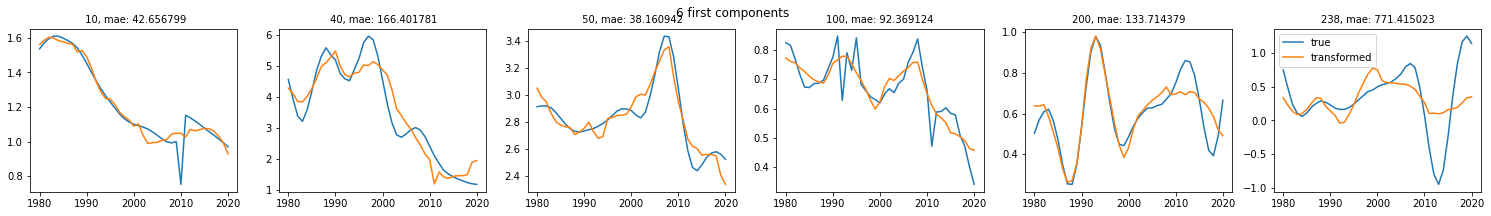

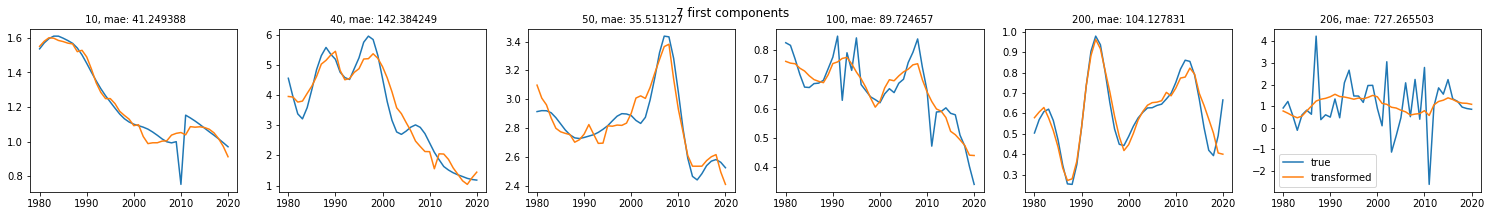

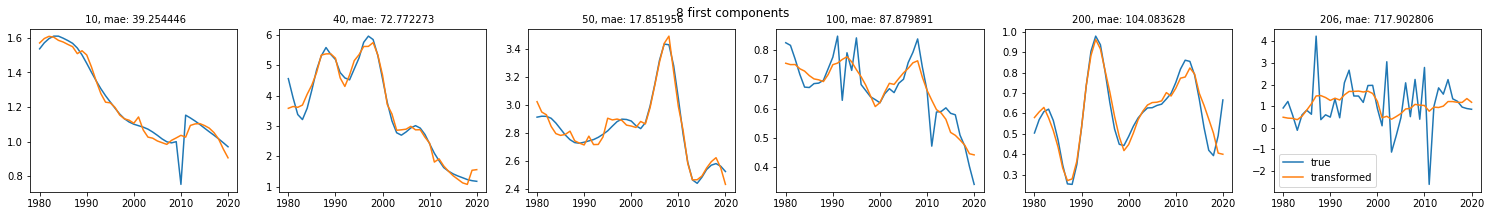

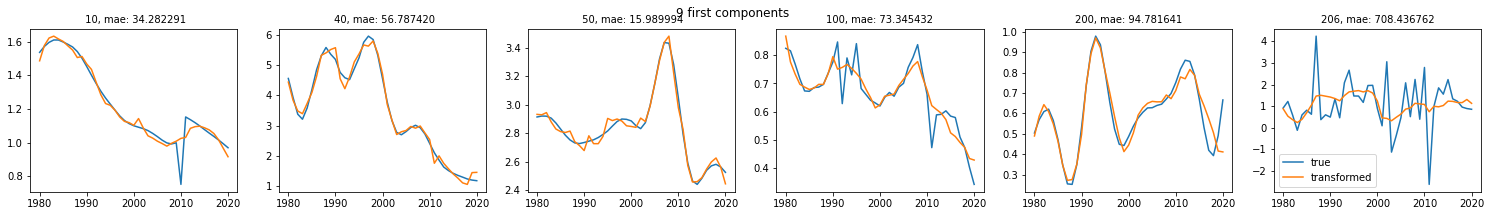

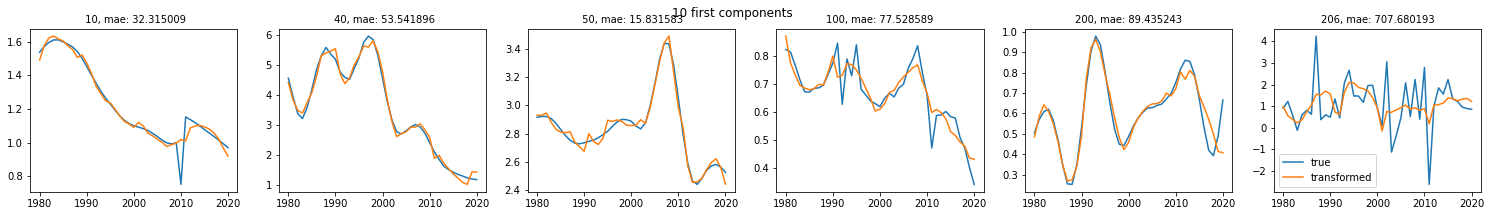

In [18]:
INDICES = [10, 40, 50, 100, 200]

for i in range(1, 11):
    plt.figure(figsize=(26, 3))

    X_tmp = X_pca[:, :i] @ pca.components_[:i] + pca.mean_
    mae_list = [mean_absolute_error(x, x_tmp) * MAE_SCALE for x, x_tmp in zip(X, X_tmp)]
    X_tmp = preprocess_inverse(X_tmp)

    indices = INDICES + [np.argmax(mae_list)]
    for j, idx in enumerate(indices):
        plt.subplot(1, len(indices), j + 1)
        plt.plot(years, X_base[idx], label="true")
        plt.plot(years, X_tmp[idx], label="transformed")
        plt.title(f"{idx:3}, mae: {mae_list[idx]:0.6f}", fontsize=10)

    plt.suptitle(f"{i} first components")
    plt.legend()
    plt.show()

# Autoencoder v1

In [19]:
import tensorflow as tf
from tensorflow.keras import layers as tf_layers

TRAIN_AUTOENCODERS = True

In [20]:
def test_autoencoder(
    create_model, n_start, n_end, name, batch_size=128, n_epochs=500, train=True
):
    histories = {}
    models = {}

    for n_bottleneck in range(n_start, n_end):
        print(f"Starting {n_bottleneck}... ", end="")

        autoencoder_model = create_model(n_bottleneck)
        models[n_bottleneck] = autoencoder_model

        if train:
            history, t = run_and_measure(
                autoencoder_model.fit,
                X,
                X,
                batch_size=batch_size,
                verbose=0,
                epochs=n_epochs,
            )
            print(f"{t:0.2f} s")
            history = history.history
            autoencoder_model.save_weights(
                f"model_checkpoints/{name}/{n_bottleneck}/weights"
            )
            pd.DataFrame(history).to_csv(
                f"model_checkpoints/{name}/{n_bottleneck}/log.csv"
            )
        else:
            history = pd.read_csv(f"model_checkpoints/{name}/{n_bottleneck}/log.csv")
            autoencoder_model.load_weights(
                f"model_checkpoints/{name}/{n_bottleneck}/weights"
            )
            print()

        histories[n_bottleneck] = history

    return histories, models


def plot_histories(histories, title, ymax=400, n_epochs=500, print_mae=True):
    plt.figure(figsize=(12, 8))

    for n_bottleneck, history in histories.items():
        plt.plot(np.arange(1, n_epochs + 1), history["loss"], label=f"{n_bottleneck}")

    plt.ylim(0, ymax)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

    for n_bottleneck, history in histories.items():
        print(f"n_bottleneck={n_bottleneck:2}: mae={min(history['loss']):0.6f}")


def plot_transformed_data_autoencoder(X_base, X, models, indices=INDICES, inverse=True):
    for i, (n_bottleneck, model) in enumerate(models.items()):
        plt.figure(figsize=(26, 3))

        X_tmp = model.predict(X)

        mae_list = [
            mean_absolute_error(x, x_tmp) * MAE_SCALE for x, x_tmp in zip(X, X_tmp)
        ]
        current_indices = indices + [np.argmax(mae_list)]

        if inverse:
            X_tmp = preprocess_inverse(X_tmp)

        for j, idx in enumerate(current_indices):
            plt.subplot(1, len(current_indices), j + 1)
            plt.plot(years, X_base[idx], label="true")
            plt.plot(years, X_tmp[idx], label="transformed")
            plt.title(f"{idx:3}, mae: {mae_list[idx]:0.6f}", fontsize=10)

        plt.suptitle(f"n_bottleneck={n_bottleneck}")
        plt.legend()
        plt.show()

In [21]:
def create_autoencoder_v1(n_bottleneck):
    autoencoder = tf.keras.Sequential(
        [
            tf_layers.Input((X.shape[1],)),
            tf_layers.Dense(n_bottleneck, activation="relu"),
            tf_layers.Dense(X.shape[1]),
        ]
    )

    autoencoder.compile(
        tf.keras.optimizers.Adam(learning_rate=0.002),
        loss="mae",
        loss_weights=MAE_SCALE,
    )
    return autoencoder

In [22]:
n_epochs_1 = 1000
histories_autoencoder_v1, models_autoencoder_v1 = test_autoencoder(
    create_autoencoder_v1,
    1,
    9,
    name="autoencoder_v1",
    n_epochs=n_epochs_1,
    train=TRAIN_AUTOENCODERS,
)

Starting 1... 8.49 s
Starting 2... 8.02 s
Starting 3... 7.86 s
Starting 4... 8.02 s
Starting 5... 7.98 s
Starting 6... 7.91 s
Starting 7... 7.96 s
Starting 8... 7.94 s


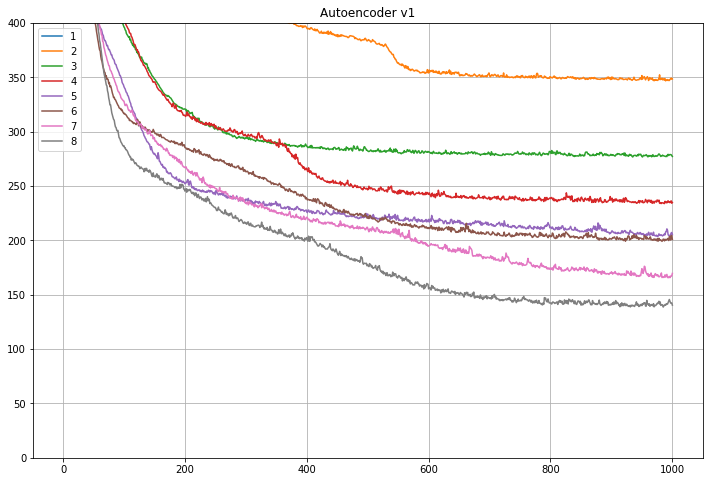

n_bottleneck= 1: mae=431.162628
n_bottleneck= 2: mae=346.727570
n_bottleneck= 3: mae=276.678802
n_bottleneck= 4: mae=233.836075
n_bottleneck= 5: mae=203.482941
n_bottleneck= 6: mae=199.101303
n_bottleneck= 7: mae=165.582840
n_bottleneck= 8: mae=138.649323


In [23]:
plot_histories(histories_autoencoder_v1, "Autoencoder v1", n_epochs=n_epochs_1)

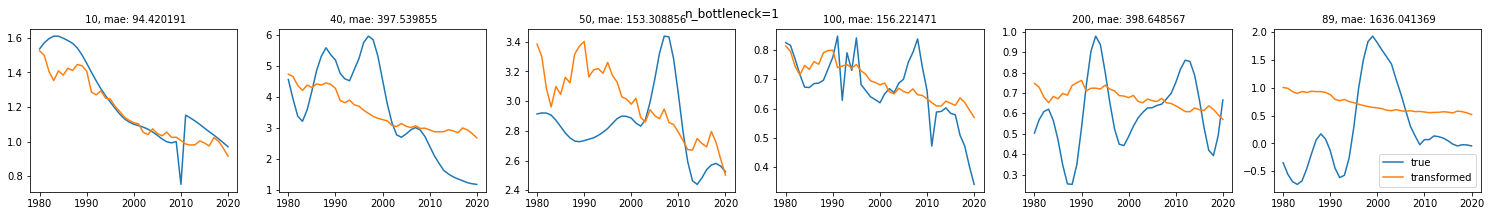

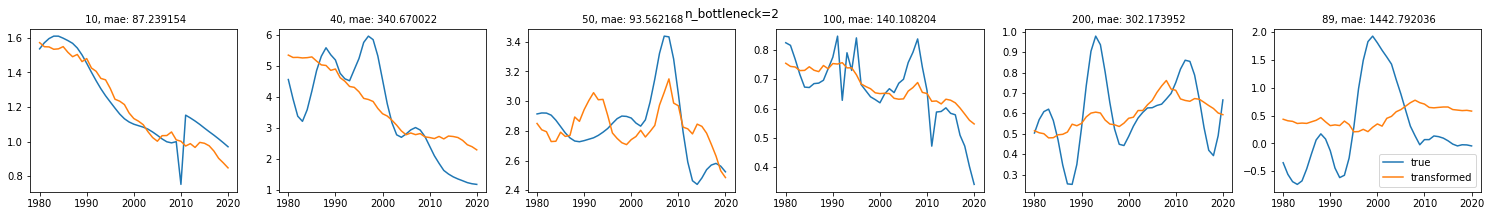

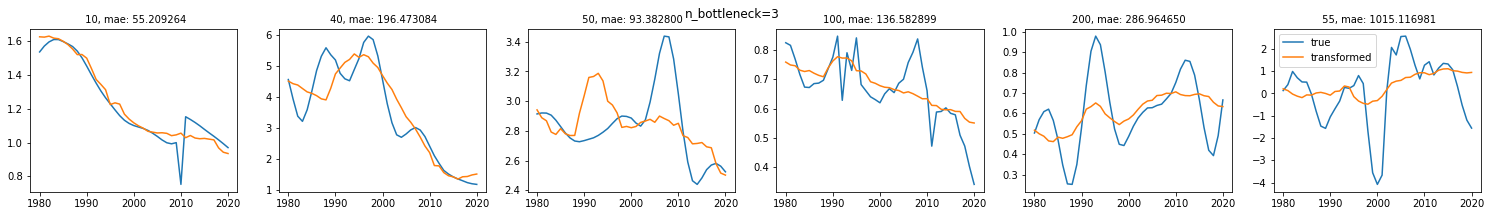

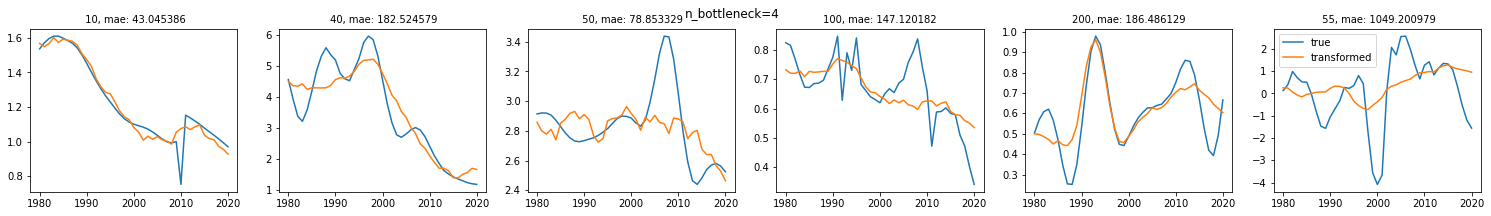

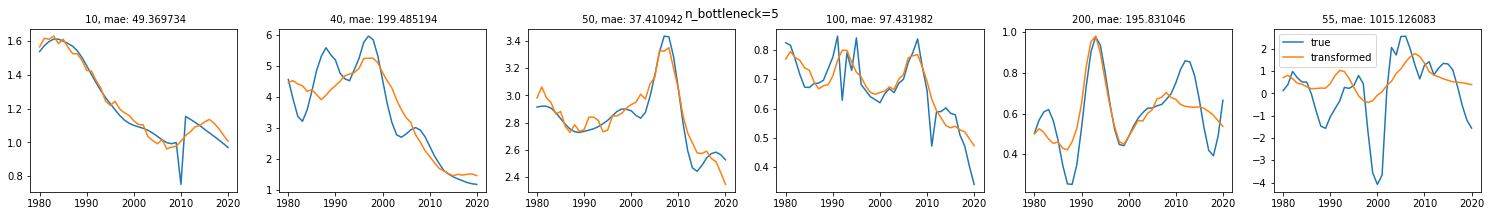

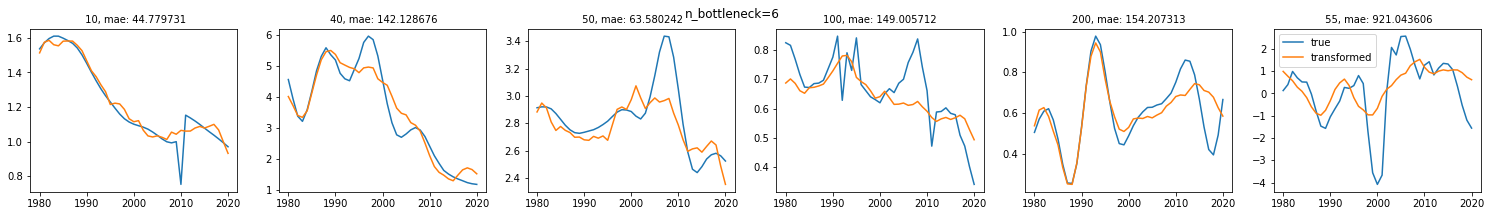

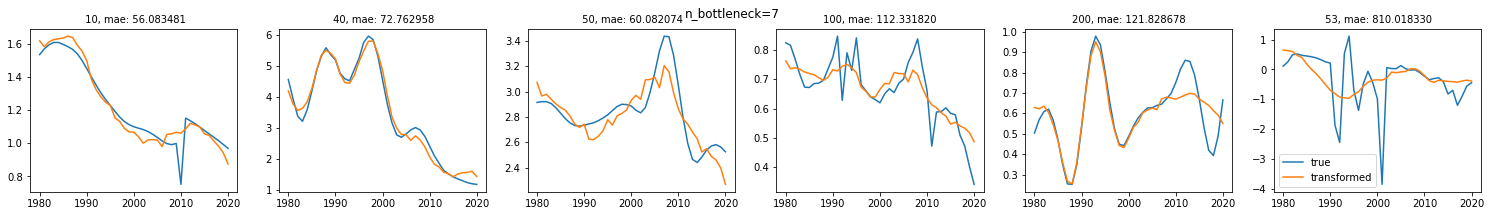

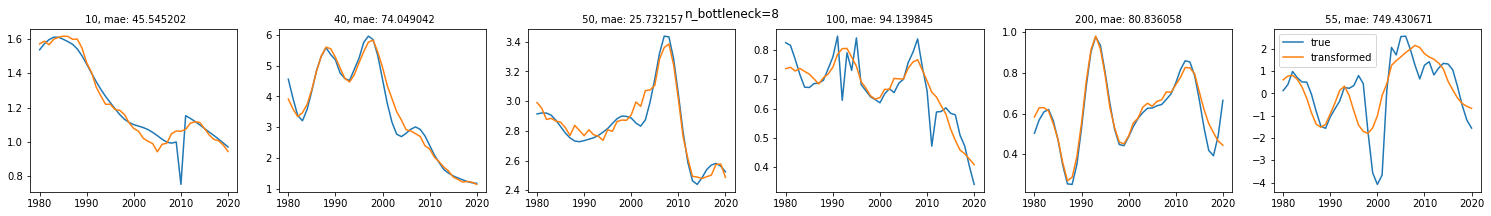

In [24]:
plot_transformed_data_autoencoder(X_base, X, models_autoencoder_v1)

# Autoencoder v2

In [41]:
def create_autoencoder_v2(n_bottleneck):
    autoencoder = tf.keras.Sequential(
        [
            tf_layers.Input((X.shape[1],)),
            tf_layers.Dense(20, activation="relu"),
            tf_layers.Dense(n_bottleneck, activation="relu"),
            tf_layers.Dense(20, activation="relu"),
            tf_layers.Dense(X.shape[1]),
        ]
    )

    autoencoder.compile(
        tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="mae",
        loss_weights=MAE_SCALE,
    )
    return autoencoder

In [42]:
n_epochs_2 = 3000
histories_autoencoder_v2, models_autoencoder_v2 = test_autoencoder(
    create_autoencoder_v2,
    1,
    9,
    name="autoencoder_v2",
    n_epochs=n_epochs_2,
    train=TRAIN_AUTOENCODERS,
)

Starting 1... 31.01 s
Starting 2... 31.35 s
Starting 3... 31.99 s
Starting 4... 28.83 s
Starting 5... 29.57 s
Starting 6... 29.58 s
Starting 7... 29.13 s
Starting 8... 29.55 s


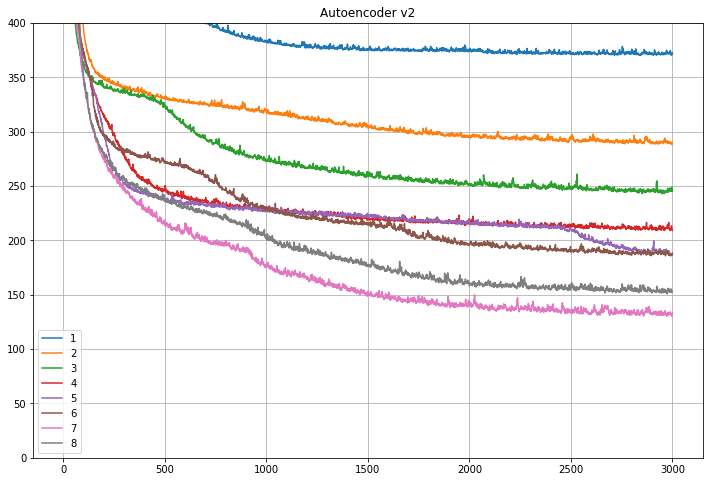

n_bottleneck= 1: mae=370.107330
n_bottleneck= 2: mae=288.305817
n_bottleneck= 3: mae=242.943375
n_bottleneck= 4: mae=209.059875
n_bottleneck= 5: mae=186.038651
n_bottleneck= 6: mae=185.837784
n_bottleneck= 7: mae=130.148270
n_bottleneck= 8: mae=150.662888


In [43]:
plot_histories(histories_autoencoder_v2, "Autoencoder v2", n_epochs=n_epochs_2)

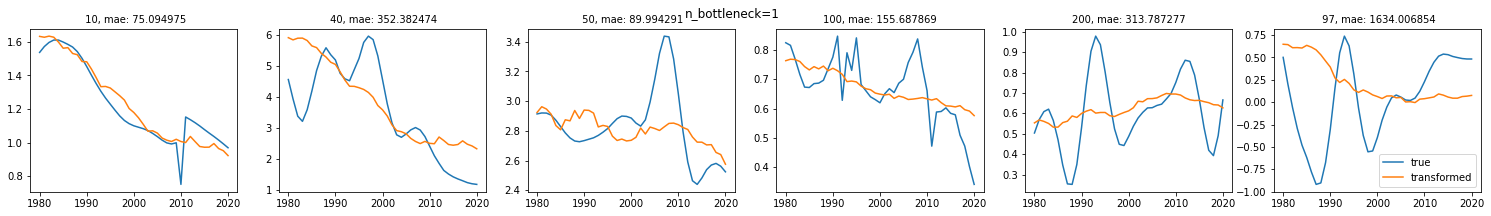

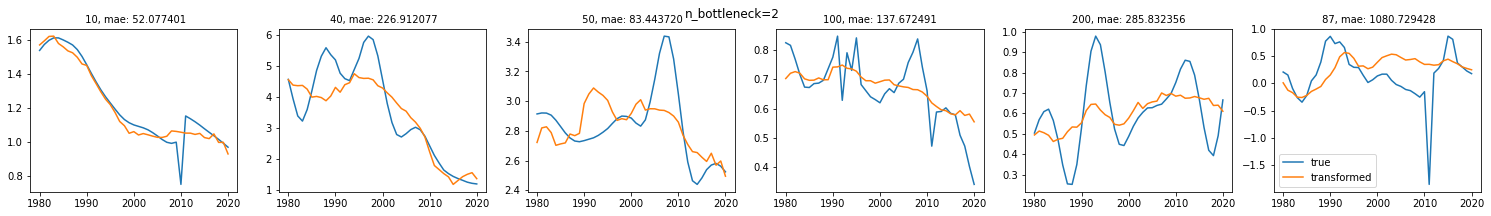

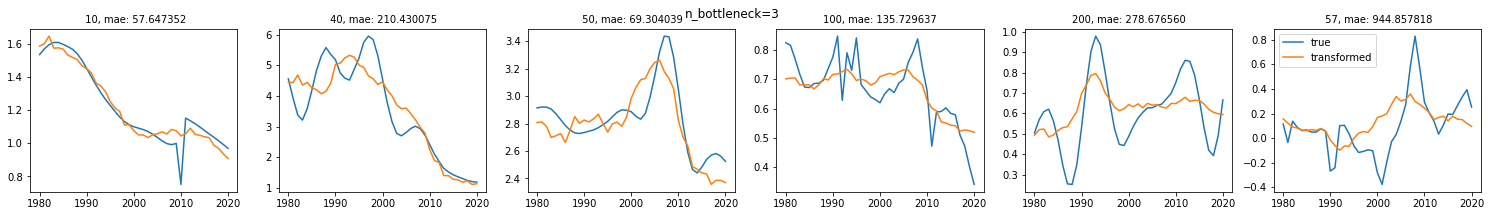

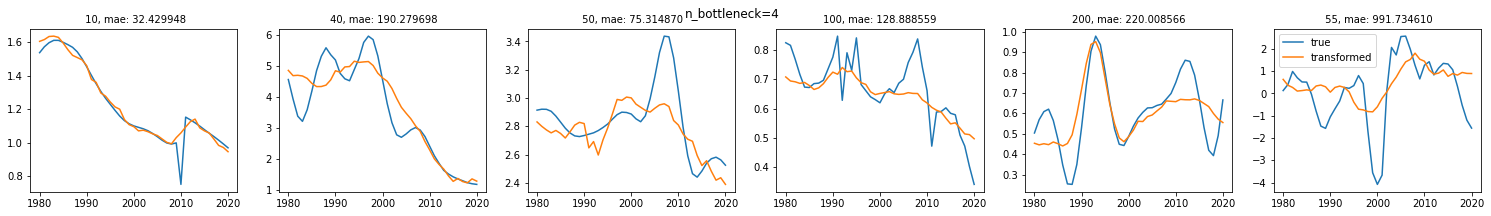

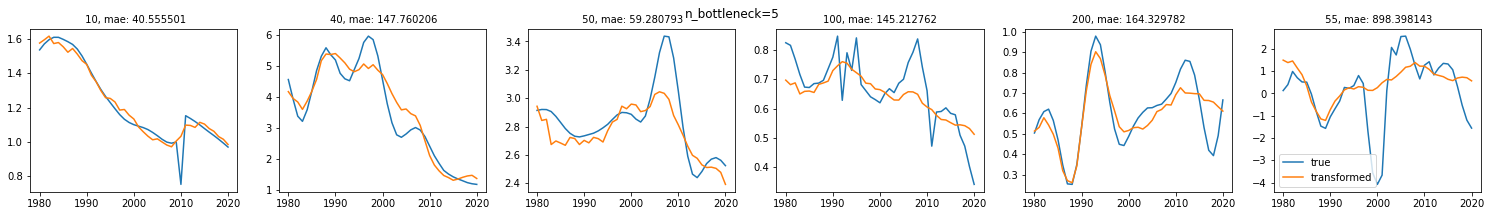

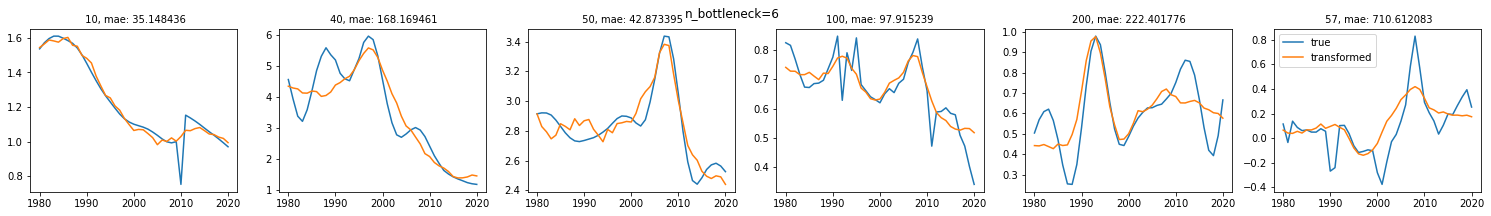

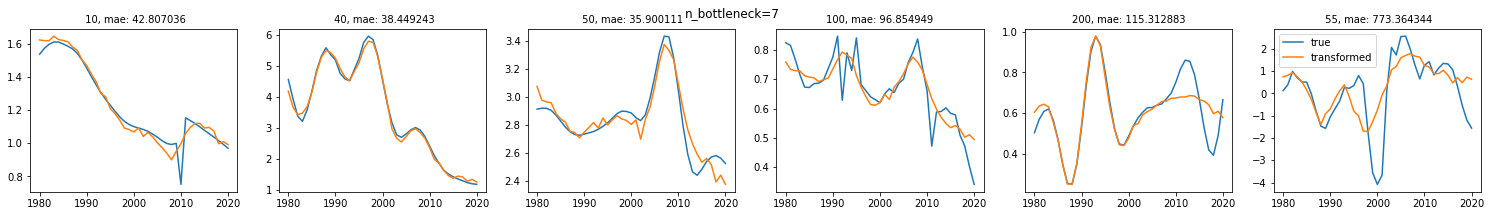

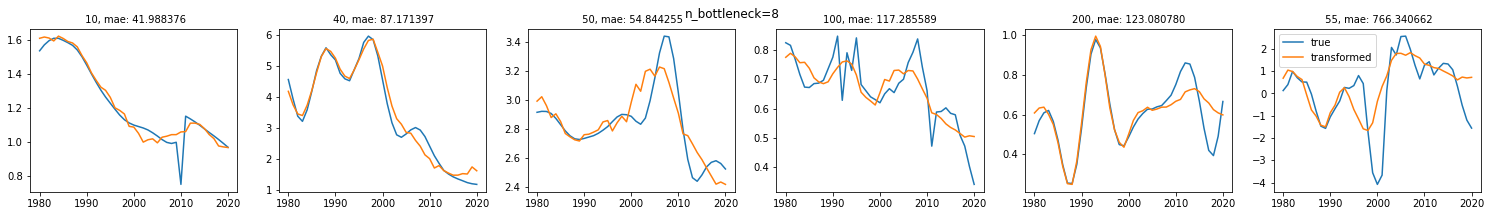

In [44]:
plot_transformed_data_autoencoder(X_base, X, models_autoencoder_v2)

# Autoencoder v3

In [53]:
def create_autoencoder_v3(n_bottleneck):
    autoencoder = tf.keras.Sequential(
        [
            tf_layers.Input((X.shape[1],)),
            tf_layers.Dense(80, activation="relu"),
            tf_layers.Dense(40, activation="relu"),
            tf_layers.Dense(20, activation="relu"),
            tf_layers.Dense(n_bottleneck, activation="relu"),
            tf_layers.Dense(20, activation="relu"),
            tf_layers.Dense(40, activation="relu"),
            tf_layers.Dense(80, activation="relu"),
            tf_layers.Dense(X.shape[1]),
        ]
    )

    autoencoder.compile(
        tf.keras.optimizers.Adam(learning_rate=0.00055),
        loss="mae",
        loss_weights=MAE_SCALE,
    )
    return autoencoder

In [54]:
n_epochs_3 = 6000
histories_autoencoder_v3, models_autoencoder_v3 = test_autoencoder(
    create_autoencoder_v3,
    1,
    9,
    name="autoencoder_v3",
    n_epochs=n_epochs_3,
    train=TRAIN_AUTOENCODERS,
)

Starting 1... 82.61 s
Starting 2... 80.85 s
Starting 3... 81.19 s
Starting 4... 86.07 s
Starting 5... 80.17 s
Starting 6... 78.51 s
Starting 7... 78.18 s
Starting 8... 77.32 s


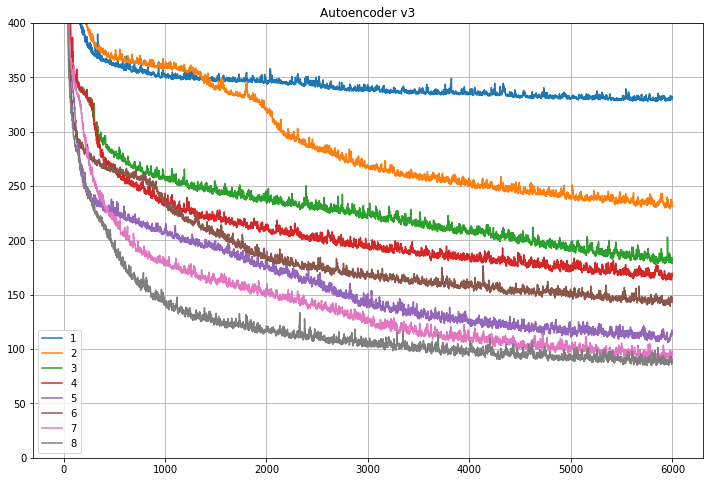

n_bottleneck= 1: mae=327.596039
n_bottleneck= 2: mae=229.044449
n_bottleneck= 3: mae=177.891891
n_bottleneck= 4: mae=163.658051
n_bottleneck= 5: mae=106.036354
n_bottleneck= 6: mae=139.376740
n_bottleneck= 7: mae=89.517151
n_bottleneck= 8: mae=84.923088


In [55]:
plot_histories(histories_autoencoder_v3, "Autoencoder v3", n_epochs=n_epochs_3)

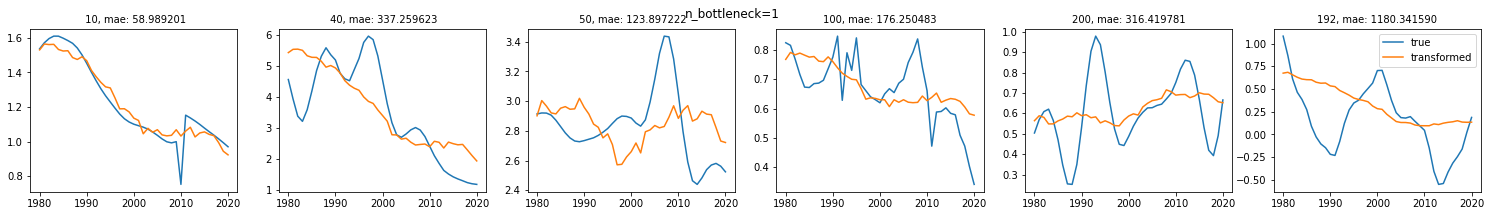

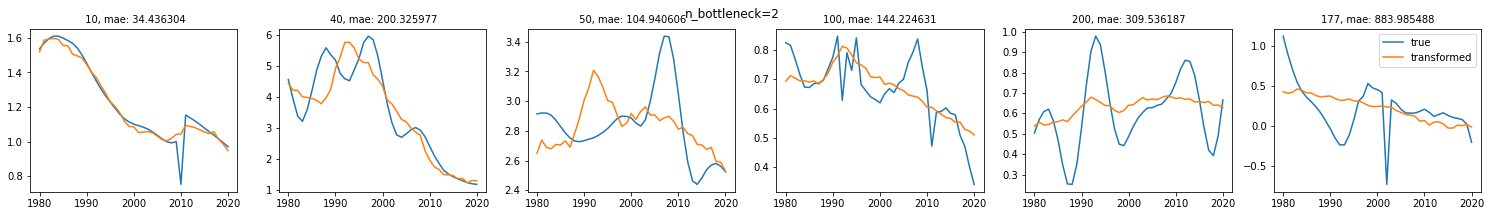

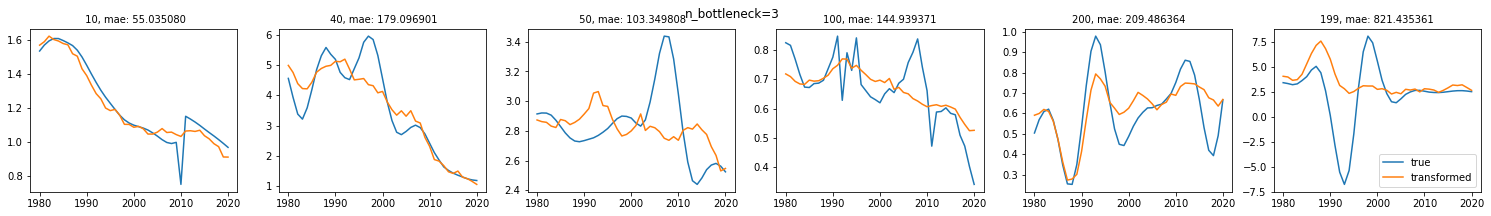

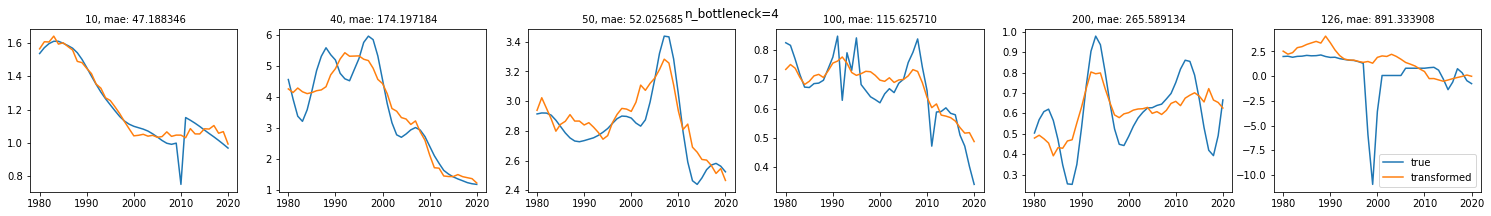

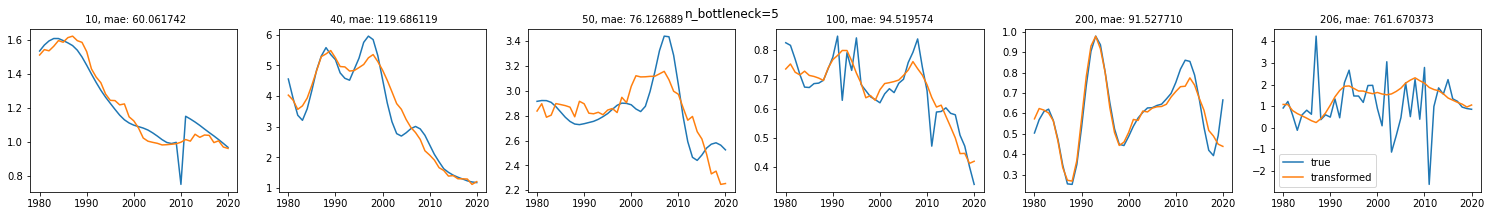

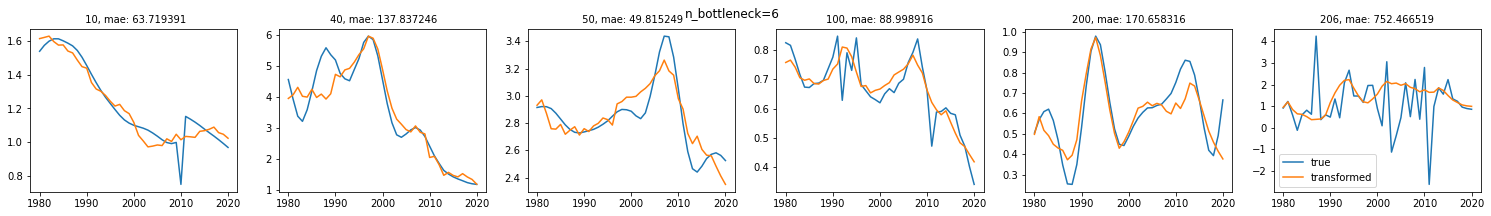

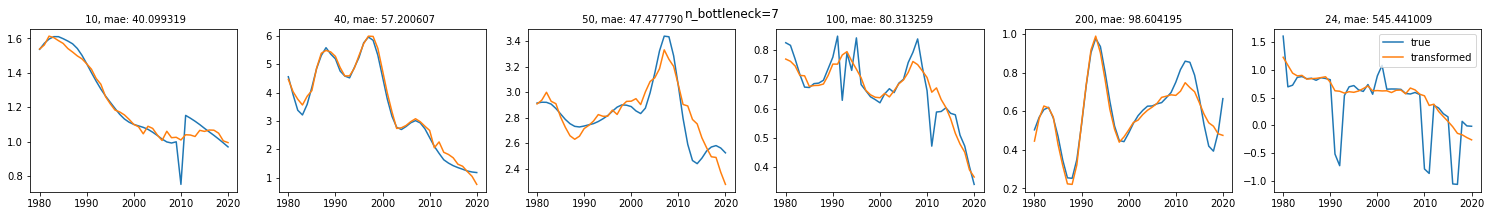

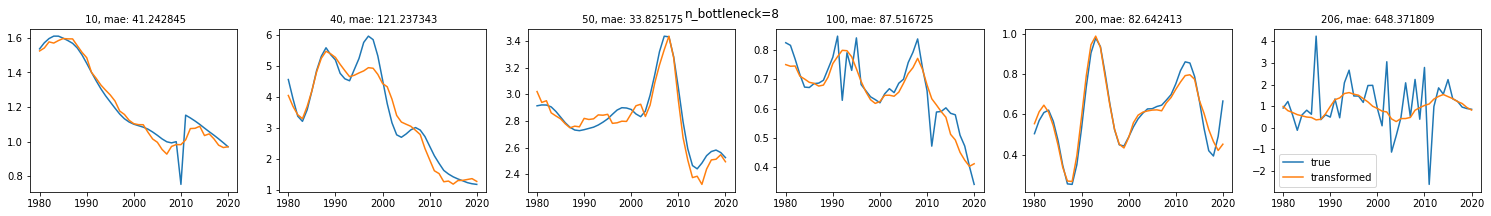

In [56]:
plot_transformed_data_autoencoder(X_base, X, models_autoencoder_v3)

# Autoencoder v4

In [49]:
def create_autoencoder_v4(n_bottleneck):
    autoencoder = tf.keras.Sequential(
        [
            tf_layers.Input((X.shape[1],)),
            tf_layers.Reshape((-1, 1)),
            tf_layers.Conv1D(32, 3, activation="relu", padding="same"),
            tf_layers.MaxPooling1D(),
            tf_layers.Conv1D(64, 3, activation="relu", padding="same"),
            tf_layers.MaxPooling1D(),
            tf_layers.Flatten(),
            tf_layers.Dense(n_bottleneck, activation="relu"),
            tf_layers.Dense(X.shape[1] // 2 // 2 * 64, activation="relu"),
            tf_layers.Reshape((-1, 64)),
            tf_layers.Conv1D(64, 3, activation="relu", padding="same"),
            tf_layers.UpSampling1D(),
            tf_layers.Conv1D(32, 3, activation="relu", padding="same"),
            tf_layers.Flatten(),
            tf_layers.Dense(X.shape[1]),
        ]
    )

    autoencoder.compile(
        tf.keras.optimizers.Adam(learning_rate=0.0003),
        loss="mae",
        loss_weights=MAE_SCALE,
    )
    return autoencoder

In [50]:
n_epochs_4 = 6000
histories_autoencoder_v4, models_autoencoder_v4 = test_autoencoder(
    create_autoencoder_v4,
    1,
    9,
    name="autoencoder_v4",
    n_epochs=n_epochs_4,
    train=TRAIN_AUTOENCODERS,
)

Starting 1... 113.34 s
Starting 2... 113.07 s
Starting 3... 114.32 s
Starting 4... 117.16 s
Starting 5... 113.77 s
Starting 6... 113.16 s
Starting 7... 112.93 s
Starting 8... 116.02 s


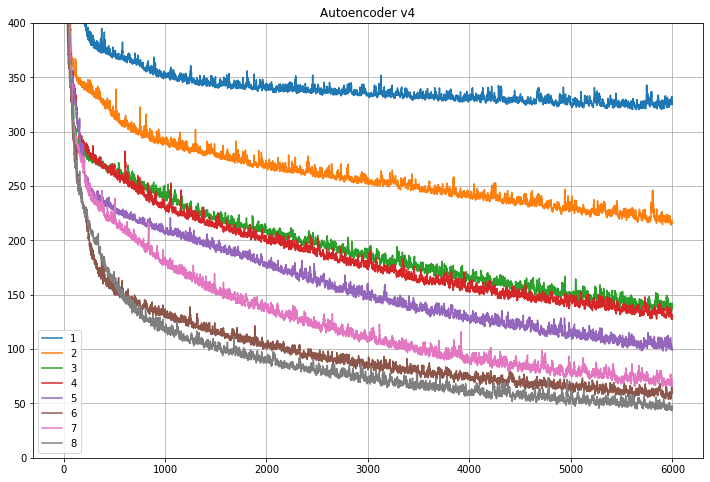

n_bottleneck= 1: mae=320.348083
n_bottleneck= 2: mae=213.993149
n_bottleneck= 3: mae=133.152649
n_bottleneck= 4: mae=127.304626
n_bottleneck= 5: mae=98.193909
n_bottleneck= 6: mae=53.763550
n_bottleneck= 7: mae=65.478745
n_bottleneck= 8: mae=43.240959


In [51]:
plot_histories(histories_autoencoder_v4, "Autoencoder v4", n_epochs=n_epochs_4)

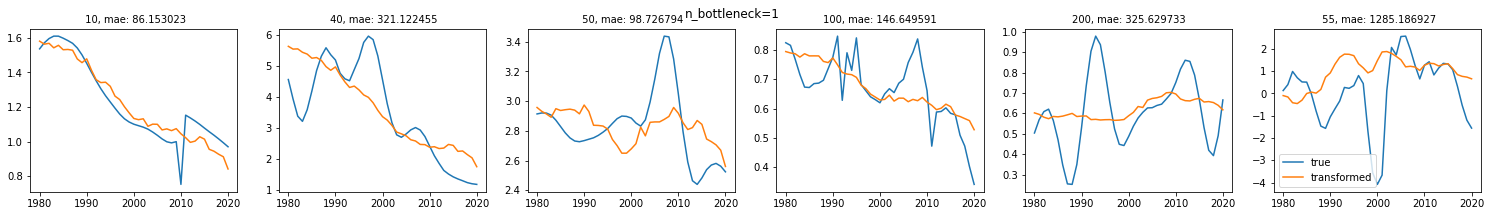

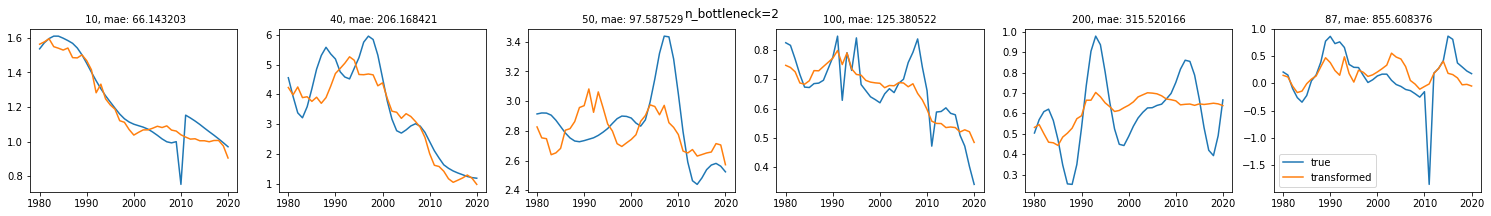

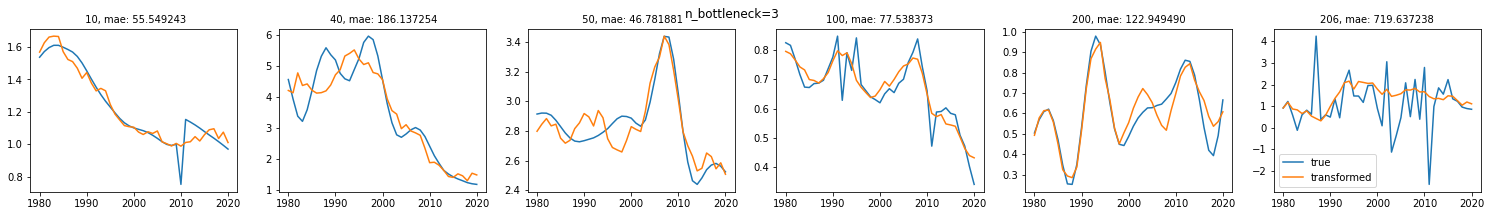

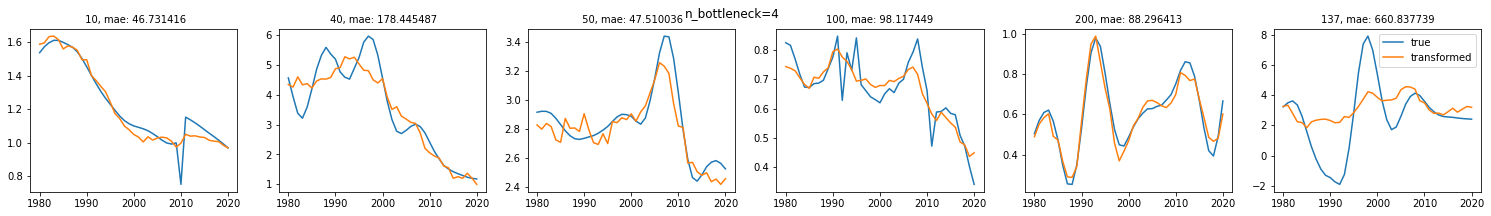

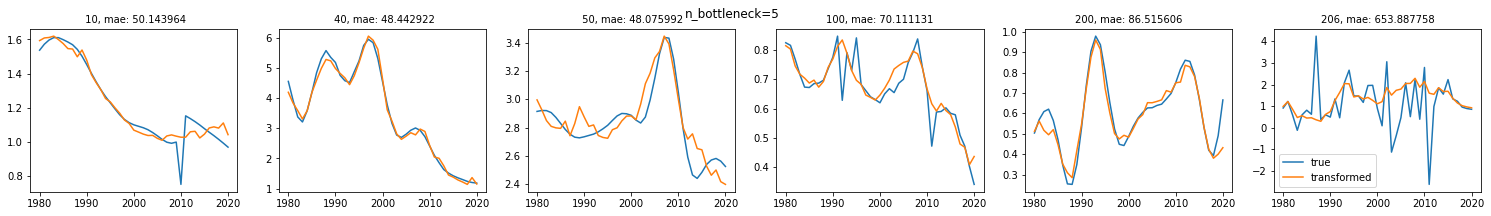

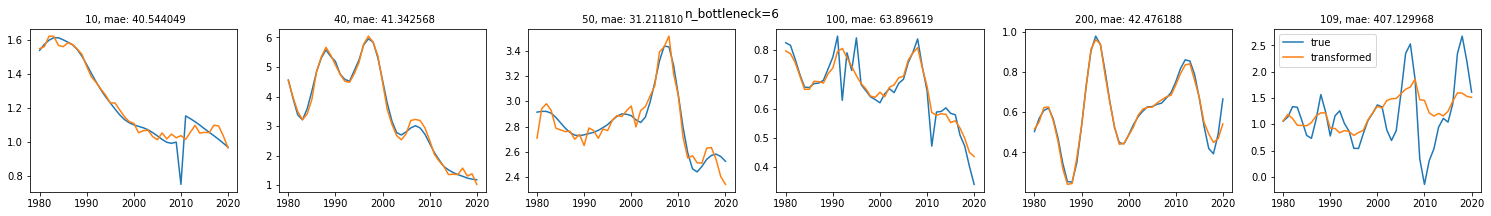

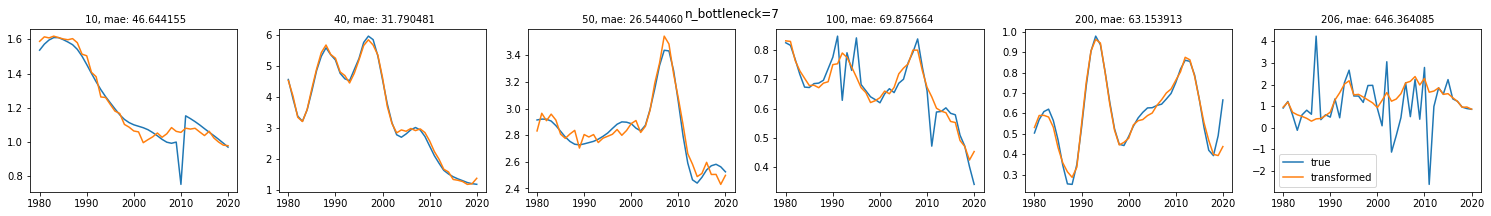

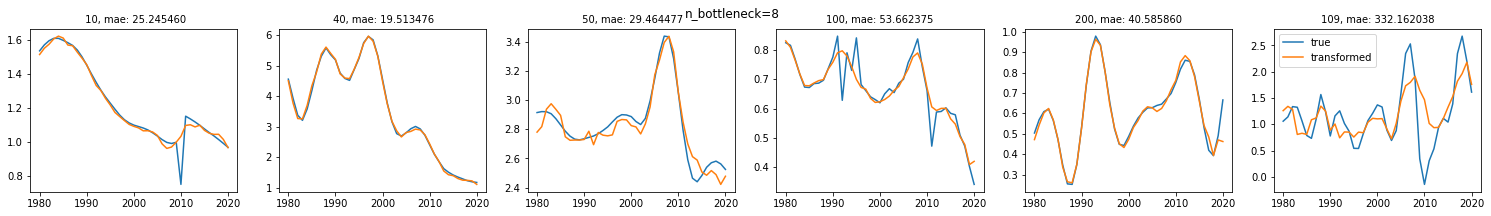

In [52]:
plot_transformed_data_autoencoder(X_base, X, models_autoencoder_v4)

# Autoencoder v5

In [67]:
def create_autoencoder_v5(n_bottleneck):
    autoencoder = tf.keras.Sequential(
        [
            tf_layers.Input((X.shape[1],)),
            tf_layers.Reshape((-1, 1)),
            tf_layers.Conv1D(32, 3, activation="relu", padding="same"),
            tf_layers.MaxPooling1D(),
            tf_layers.Conv1D(64, 3, activation="relu", padding="same"),
            tf_layers.MaxPooling1D(),
            tf_layers.Conv1D(128, 3, activation="relu", padding="same"),
            tf_layers.MaxPooling1D(),
            tf_layers.Flatten(),
            tf_layers.Dense(n_bottleneck, activation="relu"),
            tf_layers.Dense(X.shape[1] // 2 // 2 // 2 * 128, activation="relu"),
            tf_layers.Reshape((-1, 128)),
            tf_layers.Conv1D(128, 3, activation="relu", padding="same"),
            tf_layers.UpSampling1D(),
            tf_layers.Conv1D(64, 3, activation="relu", padding="same"),
            tf_layers.UpSampling1D(),
            tf_layers.Conv1D(32, 3, activation="relu", padding="same"),
            tf_layers.Flatten(),
            tf_layers.Dense(X.shape[1]),
        ]
    )

    autoencoder.compile(
        tf.keras.optimizers.Adam(learning_rate=0.00014),
        loss="mae",
        loss_weights=MAE_SCALE,
    )
    return autoencoder

In [68]:
n_epochs_5 = 10000
histories_autoencoder_v5, models_autoencoder_v5 = test_autoencoder(
    create_autoencoder_v5,
    1,
    9,
    name="autoencoder_v5",
    n_epochs=n_epochs_5,
    train=TRAIN_AUTOENCODERS,
)

Starting 1... 243.49 s
Starting 2... 248.57 s
Starting 3... 247.36 s
Starting 4... 243.63 s
Starting 5... 253.75 s
Starting 6... 241.98 s
Starting 7... 242.53 s
Starting 8... 238.58 s


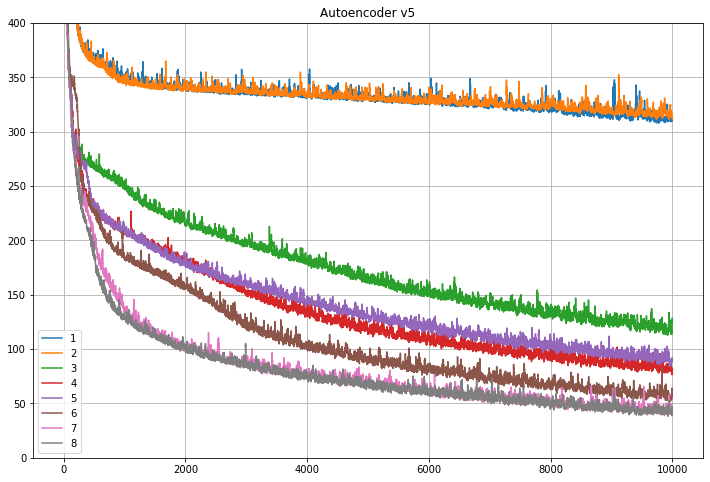

n_bottleneck= 1: mae=307.751862
n_bottleneck= 2: mae=311.287476
n_bottleneck= 3: mae=113.075951
n_bottleneck= 4: mae=76.548134
n_bottleneck= 5: mae=83.890091
n_bottleneck= 6: mae=52.233402
n_bottleneck= 7: mae=39.211761
n_bottleneck= 8: mae=38.205330


In [69]:
plot_histories(histories_autoencoder_v5, "Autoencoder v5", n_epochs=n_epochs_5)

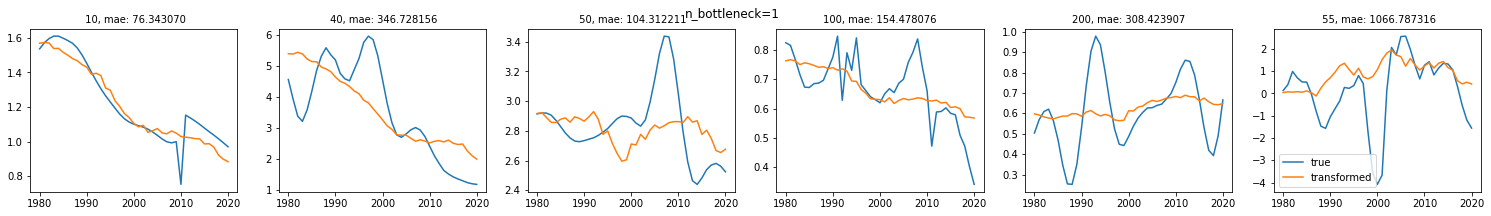

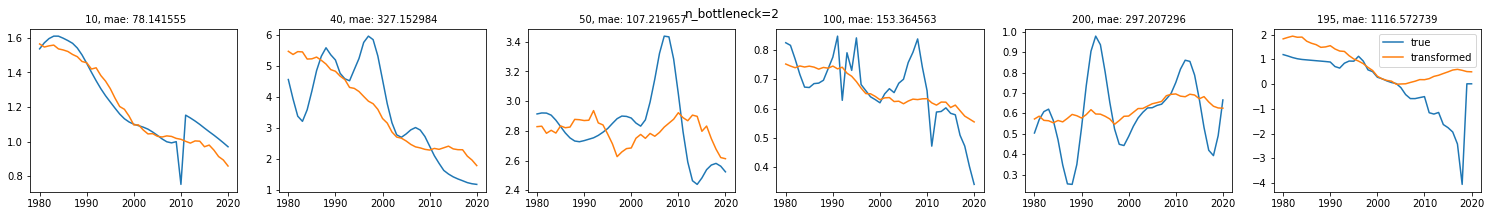

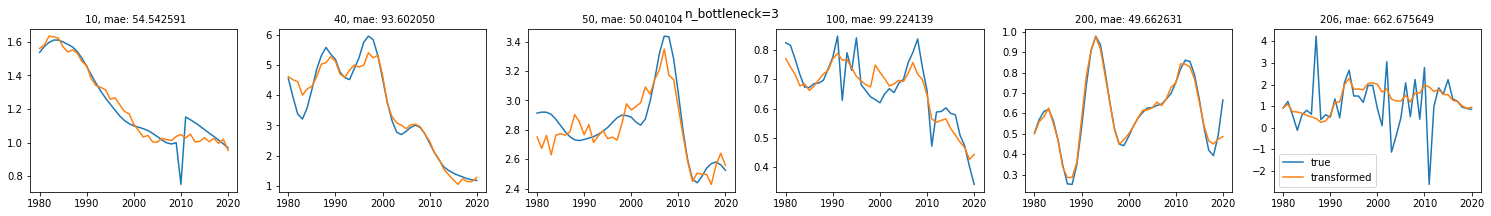

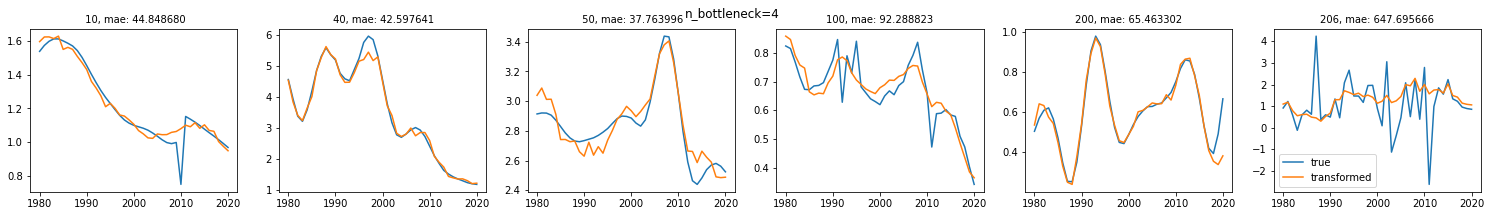

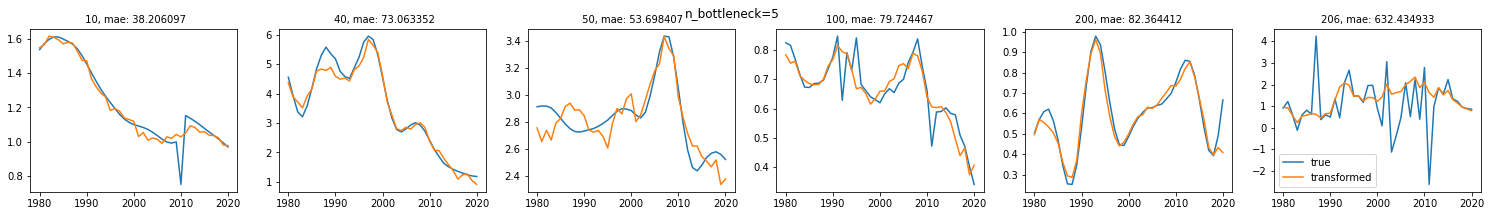

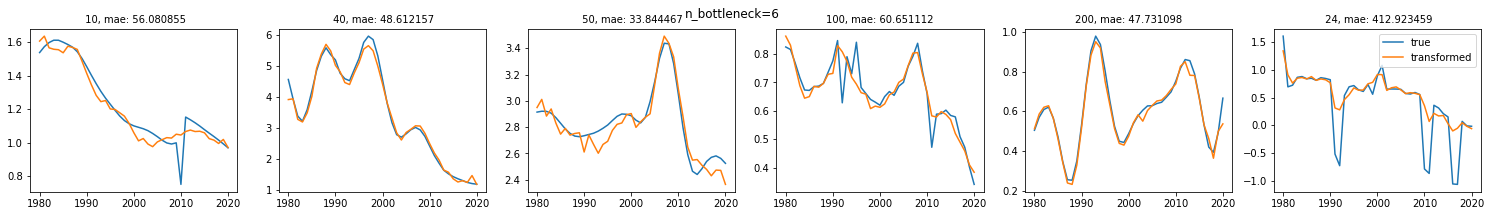

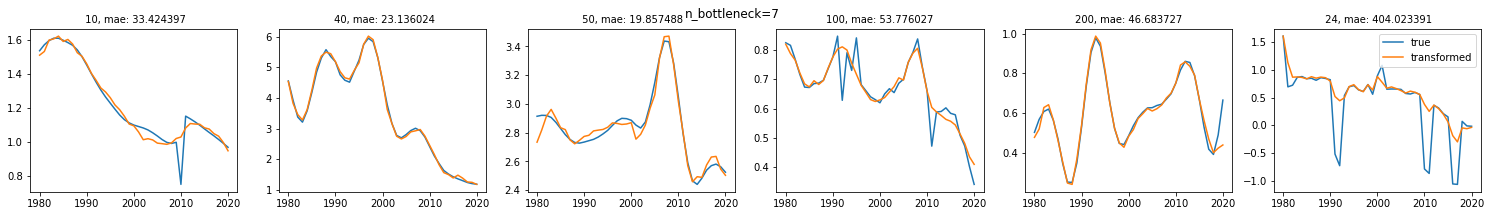

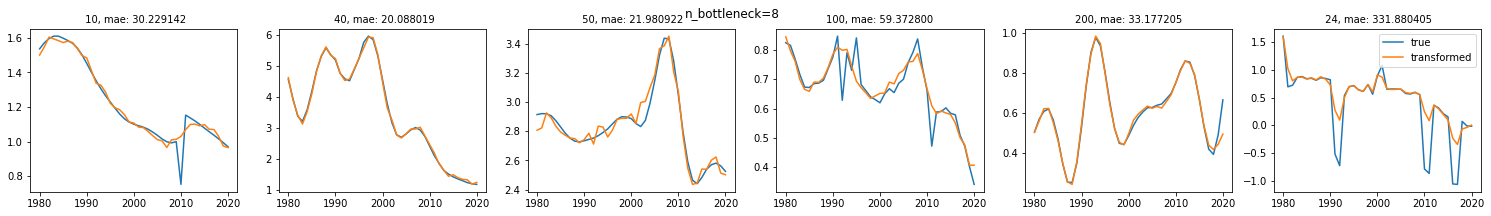

In [70]:
plot_transformed_data_autoencoder(X_base, X, models_autoencoder_v5)

---

In [71]:
all_histories = [
    histories_autoencoder_v1,
    histories_autoencoder_v2,
    histories_autoencoder_v3,
    histories_autoencoder_v4,
    histories_autoencoder_v5,
]

for i, histories in enumerate(all_histories):
    print(f"{i + 1}: ", end="")
    for n_bottleneck, history in histories.items():
        print(f"{min(history['loss']):6.2f}, ", end="")
    print()

1: 431.16, 346.73, 276.68, 233.84, 203.48, 199.10, 165.58, 138.65, 
2: 370.11, 288.31, 242.94, 209.06, 186.04, 185.84, 130.15, 150.66, 
3: 327.60, 229.04, 177.89, 163.66, 106.04, 139.38,  89.52,  84.92, 
4: 320.35, 213.99, 133.15, 127.30,  98.19,  53.76,  65.48,  43.24, 
5: 307.75, 311.29, 113.08,  76.55,  83.89,  52.23,  39.21,  38.21, 
